# Interactive Gamma Distribution

The Gamma Distribution is actually not a single distribution, but a family of distributions characterized by two parameters. There are three more or less common ways to parameterize the Gamma Distribution, but from the mathematical form it's not immediately obvious what the parameters do (in any of the three cases). I put together this interactive notebook to help gain some insight into what the parameters do.

## Instructions
If you're not a python person, or are unfamiliar with the Jupyter (formerly IPython) notebook, you should click on the "Run All" option in the Cell menu above, and then look for the three labeled plots with accompanying sliders below. Moving the sliders will change the value of the indicated parameter, and the plot will update, showing you what the parameter does.

In [1]:
from ipywidgets import interactive
from scipy.stats import gamma
import numpy as np
from IPython.display import display, clear_output

import matplotlib.pyplot as plt

%config InlineBackend.close_figures=False

x = np.arange(0, 40, 0.005)
def gamma_plot_setup():
    shape = 5
    scale = 0.5
    fig, ax = plt.subplots()
    y = gamma.pdf(x, shape, scale=scale)
    line = ax.plot(x, y)
    ax.set_ylim((0,0.5))
    return fig, ax, line[0]

def gamma_update_ss(shape, scale):
    y = gamma.pdf(x, shape, scale=scale)
    liness.set_ydata(y)
    figss.canvas.draw()
    #clear_output(wait=True)
    display(figss)

def gamma_update_sr(shape, rate):
    y = gamma.pdf(x, shape, scale=1.0/rate)
    linesr.set_ydata(y)
    figsr.canvas.draw()
    #clear_output(wait=True)
    display(figsr)
    
def gamma_update_sm(shape, mean):
    y = gamma.pdf(x, shape, scale=mean/shape)
    linesm.set_ydata(y)
    figsm.canvas.draw()
    #clear_output(wait=True)
    display(figsm)
    
figss, axss, liness = gamma_plot_setup()
figsr, axsr, linesr = gamma_plot_setup()
figsm, axsm, linesm = gamma_plot_setup()

%matplotlib inline

# Shape and Scale parameterization
The first parameterization involves a shape parameter $k$ and a scale parameter $\theta$.

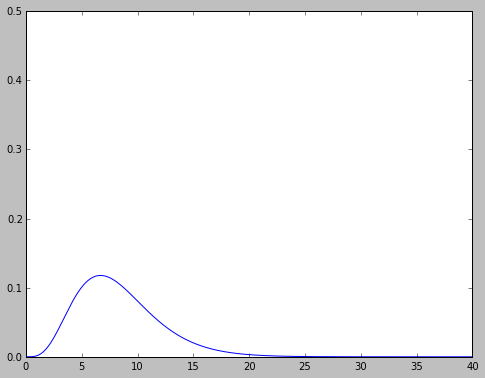

In [2]:
v = interactive(gamma_update_ss, shape=(0.1, 10.0), scale=(0.3, 3.0))
display(v)

## Shape and Rate parameterization

The second parameterization is shape (this time $a$ gets used instead of $k$, but it's the same thing) and inverse scale, or rate $\beta=\frac{1}{\theta}$. There actually isn't much value in having this when we have the shape and scale paramaterization, but it's here for completeness.

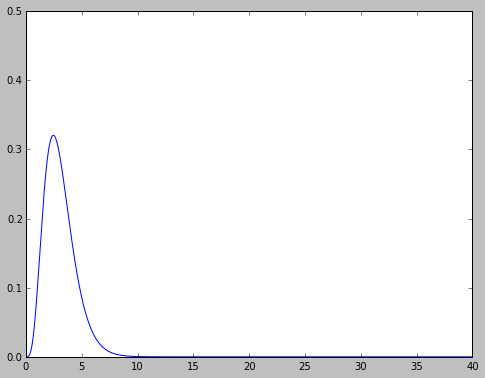

In [3]:
sr = interactive(gamma_update_sr, shape=(0.1, 10.0), rate=(0.3, 3.0))
display(sr)

## Shape and Mean

Again, the shape parameter is the same, but now the second parameter is $\mu= \frac{k}{\beta} = k\theta$. With this parameterization, it's clearer that the parameters do different things, and what they do.

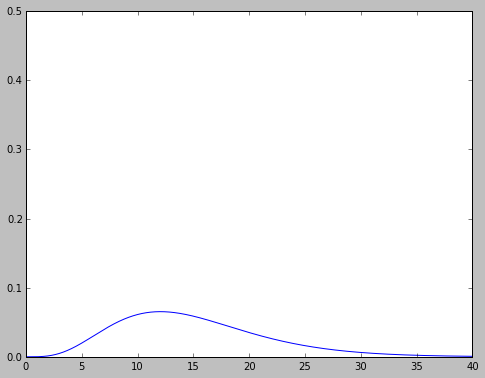

In [4]:
sm = interactive(gamma_update_sm, shape=(0.1, 10.0), mean=(0.03, 30.0))
display(sm)